In [7]:
import pandas
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.preprocessing
from IPython.display import display

In [3]:
# Load genes involved in HRD signature
hrd_genes = pandas.read_csv("data/hrd-ensembl-mapping.csv")

In [4]:
# Load TCGA BRCA gene-level expression data

brca = pandas.read_csv("data/BRCA.tsv", sep="\t")
brca["ensembl"] = brca["gene"].str.split(".").apply(lambda x: x[0])
brca = brca.drop(columns=["gene"])

brca_hrd = pandas.merge(brca, hrd_genes, on="ensembl")
brca_hrd = brca_hrd.drop(columns=["ensembl"])
brca_hrd = brca_hrd.set_index("symbol")
brca_hrd.head()

,002ab6fc-4846-41a0-8cf5-3109b2732799,008886b5-e60a-4dca-9730-ababd8ae1e94,00ced7ca-b737-4b98-9569-4bf5d0e7e2fc,00ff3cf6-3b54-4748-9058-f3afb106d9b8,01234b07-ab4c-4399-bea8-65c44c79ac35,013b4596-dedc-49ff-bfe7-1153a32d7d3d,014e0744-afe7-49a2-a560-6f1d0e4dff9e,01ece777-02ae-4657-b295-1943959f5e1e,0235d954-ff3e-403b-b3d3-ef8147d22433,02d32029-f952-4b8d-81e5-51507848080f,...,fdfdb012-019b-479c-9fed-dc91ade43931,fe2faea1-8412-4b30-a426-dd576f2c3172,fe3b3b95-4e97-4daf-8a82-1bd298178779,fe7cbe2d-2e22-4ca4-aa8b-e1ae81d90ffe,fe9ddc59-a7c9-49c6-85e9-e9078403d660,ff20324c-a37e-4b9f-88b7-ce5a9e8f06f5,ff46d2f0-f6c0-4139-9071-793178a966a5,ff617209-ac32-4068-a9c6-2ef1ef8d7cf9,ff618ed0-c277-4568-89b0-efe2504cb58e,ffada4c0-becc-4997-a0aa-e1f77ec78038
symbol,,,,,,,,,,,,,,,,,,,,,
C1orf112,5.733918,11.294580,7.414904,3.609971,5.415476,8.168466,14.381264,20.542002,4.957248,15.055492,...,5.664971,13.493400,5.033714,20.097334,4.409322,8.804403,9.012703,6.034604,6.150585,4.512325
SLC25A13,6.207047,19.973277,13.763771,14.490038,13.483246,8.276744,11.661209,32.265923,13.273149,18.629815,...,13.124508,12.258028,12.772927,18.565626,14.431854,16.695473,12.448741,3.333279,10.592220,13.901447
ALDH3B1,1.531553,7.465445,5.521861,4.979278,8.665158,4.792605,5.806637,16.279066,7.460928,5.671539,...,5.027473,7.540086,5.343821,2.691691,4.046537,4.379769,4.595581,4.648535,7.771277,3.788174
ARSD,25.217997,22.331346,51.767041,28.738088,22.474169,39.356698,21.946462,24.403565,56.670820,60.030916,...,45.148027,47.388176,9.478532,72.777338,70.137149,82.778895,50.068353,36.724929,44.618054,66.345121
E2F2,0.580222,2.250420,3.250400,0.557452,1.328920,2.127040,3.793007,6.172293,1.111620,1.520350,...,0.491516,3.255940,1.231680,1.783869,0.572050,3.089870,1.172820,0.432542,1.150510,0.490560


In [5]:
brca_hrd.shape

(220, 1256)

[755.12613822 139.29012686]


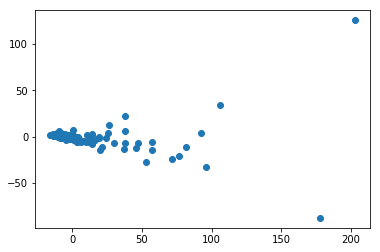

In [8]:
brca_scaled = sklearn.preprocessing.scale(brca_hrd)

p = PCA(n_components=2).fit(brca_scaled)
X = p.transform(brca_scaled)
plt.scatter(X[:, 0], X[:, 1])
print(p.explained_variance_)

In [11]:
pandas.DataFrame(brca_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255
0,-0.200491,-0.338838,-0.428134,-0.241631,-0.338461,-0.392730,-0.326084,-0.342110,-0.368169,-0.267713,...,-0.193067,-0.357017,-0.374135,-0.335643,-0.385307,-0.472354,-0.392962,-0.388146,-0.358158,-0.276661
1,-0.196832,-0.228810,-0.350146,-0.181947,-0.237096,-0.391055,-0.368973,-0.184151,-0.282768,-0.232342,...,-0.159525,-0.373194,-0.232023,-0.353394,-0.289915,-0.344109,-0.346790,-0.423861,-0.310319,-0.199836
2,-0.232986,-0.387383,-0.451388,-0.234119,-0.297631,-0.444953,-0.461286,-0.399546,-0.342457,-0.360577,...,-0.195933,-0.434974,-0.368441,-0.537357,-0.388760,-0.544263,-0.452317,-0.406472,-0.340702,-0.282586
3,-0.049830,-0.198915,0.116681,-0.103787,-0.124132,0.089737,-0.206797,-0.290083,0.162907,0.177361,...,-0.015531,0.086830,-0.292516,0.274866,0.240274,0.729873,0.158724,0.017624,0.056156,0.229276
4,-0.240342,-0.453499,-0.479290,-0.258376,-0.389805,-0.486188,-0.493037,-0.535717,-0.407662,-0.401657,...,-0.216329,-0.491074,-0.443951,-0.547878,-0.421829,-0.565227,-0.498310,-0.462213,-0.412011,-0.309568


In [12]:
# Load TCGA aliquot sample types (normal vs tumor)
aliquot_sample_types = pandas.read_csv("data/tcga-aliquot-to-sample-type.csv")

In [13]:
# Load mapping of CG Hub IDs to TCGA Aliquot IDs
id_map = pandas.read_csv("data/TCGA_ID_MAP.csv")
id_map.head()

,CGHubAnalysisID,AliquotBarcode,Aliquot_id,Disease
0,3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,66770b06-2cd6-4773-b8e8-5b38faa4f5a4,LGG
1,c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,24ee58d3-60c9-4808-b35a-2767594b83f8,UCEC
2,21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,ee589fc8-daf6-4da9-9708-f18a86b96b22,LUSC
3,6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,08dbecd4-ba05-4d62-b76c-62fddccdb167,UCS
4,c8eda0ee-e5e3-4847-8c9d-c816811d6e41,TCGA-L9-A444-01A-21R-A24H-07,a3b81644-c1b8-4d12-b6f8-6160533758cc,LUAD


In [14]:
sample_meta = pandas.merge(id_map, aliquot_sample_types, left_on="AliquotBarcode", right_on="aliquot_id")[["CGHubAnalysisID", "aliquot_id", "sample_type"]]

In [15]:
sample_meta.head()

,CGHubAnalysisID,aliquot_id,sample_type
0,6101cf90-16cc-4603-89de-b04fe37009ab,TCGA-AR-A5QM-01A-11R-A27Q-07,Primary Tumor
1,41a5b666-fbaf-4080-b6ab-2ea3efcf5341,TCGA-E9-A5FL-01A-11R-A27Q-07,Primary Tumor
2,e5bcf0a8-2d8b-4213-8b84-cbb4dc5ca23f,TCGA-BH-A5J0-01A-11R-A27Q-07,Primary Tumor
3,eb1f703b-6bd1-4415-a9b7-af8c83d88593,TCGA-E9-A5UO-01A-11R-A28M-07,Primary Tumor
4,13135c3f-269e-4729-9e1e-5ecadb2d852d,TCGA-AC-A5XU-01A-11R-A28M-07,Primary Tumor


In [16]:
normal_samples = sample_meta[sample_meta["sample_type"].str.contains("Normal")]
tumor_samples = sample_meta[sample_meta["sample_type"].str.contains("Tumor")]

In [17]:
normal_samples.head()

,CGHubAnalysisID,aliquot_id,sample_type
54,7f213bf2-afa1-45b8-9b10-013fa9cad5d1,TCGA-AC-A2FM-11B-32R-A19W-07,Solid Tissue Normal
138,884c67aa-8321-4b6f-8d03-465c2dedb220,TCGA-GI-A2C9-11A-22R-A21T-07,Solid Tissue Normal
139,31ecb79f-805c-4d31-bac6-9e8b32a7ed12,TCGA-BH-A0BA-11A-22R-A19E-07,Solid Tissue Normal
194,60a4aeb3-e025-42f3-a90b-0e4c9ba3cd27,TCGA-BH-A203-11A-42R-A169-07,Solid Tissue Normal
195,00ff3cf6-3b54-4748-9058-f3afb106d9b8,TCGA-BH-A209-11A-42R-A157-07,Solid Tissue Normal


In [18]:
brca_hrd.head()

,002ab6fc-4846-41a0-8cf5-3109b2732799,008886b5-e60a-4dca-9730-ababd8ae1e94,00ced7ca-b737-4b98-9569-4bf5d0e7e2fc,00ff3cf6-3b54-4748-9058-f3afb106d9b8,01234b07-ab4c-4399-bea8-65c44c79ac35,013b4596-dedc-49ff-bfe7-1153a32d7d3d,014e0744-afe7-49a2-a560-6f1d0e4dff9e,01ece777-02ae-4657-b295-1943959f5e1e,0235d954-ff3e-403b-b3d3-ef8147d22433,02d32029-f952-4b8d-81e5-51507848080f,...,fdfdb012-019b-479c-9fed-dc91ade43931,fe2faea1-8412-4b30-a426-dd576f2c3172,fe3b3b95-4e97-4daf-8a82-1bd298178779,fe7cbe2d-2e22-4ca4-aa8b-e1ae81d90ffe,fe9ddc59-a7c9-49c6-85e9-e9078403d660,ff20324c-a37e-4b9f-88b7-ce5a9e8f06f5,ff46d2f0-f6c0-4139-9071-793178a966a5,ff617209-ac32-4068-a9c6-2ef1ef8d7cf9,ff618ed0-c277-4568-89b0-efe2504cb58e,ffada4c0-becc-4997-a0aa-e1f77ec78038
symbol,,,,,,,,,,,,,,,,,,,,,
C1orf112,5.733918,11.294580,7.414904,3.609971,5.415476,8.168466,14.381264,20.542002,4.957248,15.055492,...,5.664971,13.493400,5.033714,20.097334,4.409322,8.804403,9.012703,6.034604,6.150585,4.512325
SLC25A13,6.207047,19.973277,13.763771,14.490038,13.483246,8.276744,11.661209,32.265923,13.273149,18.629815,...,13.124508,12.258028,12.772927,18.565626,14.431854,16.695473,12.448741,3.333279,10.592220,13.901447
ALDH3B1,1.531553,7.465445,5.521861,4.979278,8.665158,4.792605,5.806637,16.279066,7.460928,5.671539,...,5.027473,7.540086,5.343821,2.691691,4.046537,4.379769,4.595581,4.648535,7.771277,3.788174
ARSD,25.217997,22.331346,51.767041,28.738088,22.474169,39.356698,21.946462,24.403565,56.670820,60.030916,...,45.148027,47.388176,9.478532,72.777338,70.137149,82.778895,50.068353,36.724929,44.618054,66.345121
E2F2,0.580222,2.250420,3.250400,0.557452,1.328920,2.127040,3.793007,6.172293,1.111620,1.520350,...,0.491516,3.255940,1.231680,1.783869,0.572050,3.089870,1.172820,0.432542,1.150510,0.490560


In [19]:
normal_cghub_ids = normal_samples["CGHubAnalysisID"]

In [20]:
normal_expr = brca_hrd.filter(items=normal_cghub_ids, axis=1)

In [21]:
normal_expr.shape

(220, 114)

In [22]:
brca_hrd.shape

(220, 1256)

In [23]:
normal_samples.shape

(114, 3)

In [24]:
tumor_cghub_ids = tumor_samples["CGHubAnalysisID"]

In [25]:
tumor_expr = brca_hrd.filter(items=tumor_cghub_ids, axis=1)

In [26]:
tumor_expr.shape

(220, 1135)

[696.42166418 103.15859644]


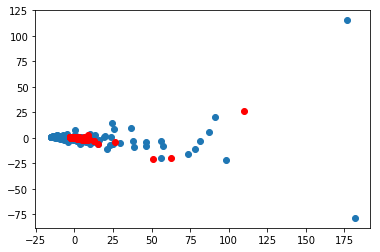

In [27]:
def tumor_pca():
    scaled = sklearn.preprocessing.scale(tumor_expr)

    p = PCA(n_components=2).fit(scaled)
    X = p.transform(scaled)
    
    scaled2 = sklearn.preprocessing.scale(normal_expr)
    p2 = PCA(n_components=2).fit(scaled2)
    X2 = p2.transform(scaled2)
    
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(X2[:, 0], X2[:, 1], color="red")

    print(p.explained_variance_)
    
tumor_pca()

In [28]:
brca_hrd_classifications = pandas.read_csv("data/tcga_brca_hrd.csv")

,sample,0,1,sample_id,dist_ctrl,dist_hrd,hrd_score,Classification
0,002ab6fc-4846-41a0-8cf5-3109b2732799,-8.120594,1.011297,002ab6fc-4846-41a0-8cf5-3109b2732799,0.618427,0.412013,-0.206415,hrd
1,008886b5-e60a-4dca-9730-ababd8ae1e94,4.085400,-3.545589,008886b5-e60a-4dca-9730-ababd8ae1e94,0.479968,0.517055,0.037087,indeterminate
2,00ced7ca-b737-4b98-9569-4bf5d0e7e2fc,2.493924,4.792635,00ced7ca-b737-4b98-9569-4bf5d0e7e2fc,0.516422,0.490417,-0.026005,indeterminate
3,00ff3cf6-3b54-4748-9058-f3afb106d9b8,-8.424825,-8.227955,00ff3cf6-3b54-4748-9058-f3afb106d9b8,0.709436,0.344568,-0.364868,hrd
4,01234b07-ab4c-4399-bea8-65c44c79ac35,-4.673059,-0.188294,01234b07-ab4c-4399-bea8-65c44c79ac35,0.591842,0.438664,-0.153177,hrd


[56.39028153 13.42650468]


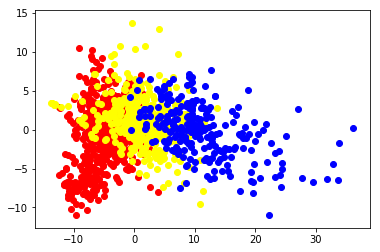

In [29]:
def pca2():
    dat = brca_hrd.transpose()
    orig_index = dat.index
    scaled = sklearn.preprocessing.scale(dat)

    p = PCA(n_components=2).fit(scaled)
    X = p.transform(scaled)
    
    X = pandas.DataFrame(X)
    X.index = orig_index
    X = X.reset_index(level=0)
    X = X.rename(columns={"index": "sample"})
    
    classified = pandas.merge(X, brca_hrd_classifications, left_on="sample", right_on="sample_id")
    display(classified.head())

    X_tumor = X[X["sample"].isin(tumor_cghub_ids)]
    X_normal = X[X["sample"].isin(normal_cghub_ids)]
    
    Y_hrd = classified[classified["Classification"] == "hrd"]
    Y_intact = classified[classified["Classification"] == "hr_intact"]
    Y_ind = classified[classified["Classification"] == "indeterminate"]
    
    #plt.scatter(X_tumor[0], X_tumor[1], color="red")
    #plt.scatter(X_normal[0], X_normal[1])
    plt.scatter(Y_hrd[0], Y_hrd[1], color="red")
    plt.scatter(Y_ind[0], Y_ind[1], color="yellow")
    plt.scatter(Y_intact[0], Y_intact[1], color="blue")
    
    print(p.explained_variance_)
    
pca2()

In [30]:
brca_hrd.transpose().head()

symbol,C1orf112,SLC25A13,ALDH3B1,ARSD,E2F2,ANLN,DCN,BRCA1,TACC3,POLA2,...,HIST2H2AA3,HSD17B8,C6orf48,HLA-E,LYRM5,DHFR,PDXP,TMEM158,TXNIP,UHRF1
002ab6fc-4846-41a0-8cf5-3109b2732799,5.733918,6.207047,1.531553,25.217997,0.580222,4.500984,377.140605,3.349571,5.918356,6.966355,...,19.44240,11.199234,194.792618,146.153032,23.651651,13.520964,3.776800,1.50739,289.453209,4.976952
008886b5-e60a-4dca-9730-ababd8ae1e94,11.294580,19.973277,7.465445,22.331346,2.250420,20.340603,721.608283,8.271808,29.545497,15.968837,...,5.60540,10.672560,249.367153,221.713437,27.816470,19.279591,3.159181,1.45075,282.727233,8.018501
00ced7ca-b737-4b98-9569-4bf5d0e7e2fc,7.414904,13.763771,5.521861,51.767041,3.250400,14.091896,314.474652,6.217075,27.988563,25.126001,...,215.35900,30.622230,167.867748,184.024178,16.852841,25.388723,6.997700,3.05698,83.308257,29.974599
00ff3cf6-3b54-4748-9058-f3afb106d9b8,3.609971,14.490038,4.979278,28.738088,0.557452,1.783946,1945.514021,3.441234,5.004191,10.941598,...,2.90891,14.652387,150.941358,700.663229,35.668947,20.004124,4.822538,2.35073,1456.313980,0.878007
01234b07-ab4c-4399-bea8-65c44c79ac35,5.415476,13.483246,8.665158,22.474169,1.328920,8.074023,886.348659,4.340900,12.869010,11.689591,...,21.43100,6.806737,103.229041,169.605796,25.187465,20.856971,4.769228,2.22209,253.662506,9.079812


[56.39028153 13.42650468]


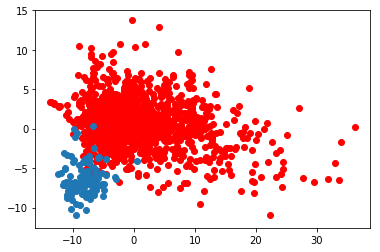

In [31]:
def pca2():
    dat = brca_hrd.transpose()
    orig_index = dat.index
    scaled = sklearn.preprocessing.scale(dat)

    p = PCA(n_components=2).fit(scaled)
    X = p.transform(scaled)
    
    X = pandas.DataFrame(X)
    X.index = orig_index
    X = X.reset_index(level=0)
    X = X.rename(columns={"index": "sample"})
    
    X_tumor = X[X["sample"].isin(tumor_cghub_ids)]
    X_normal = X[X["sample"].isin(normal_cghub_ids)]
    
    plt.scatter(X_tumor[0], X_tumor[1], color="red")
    plt.scatter(X_normal[0], X_normal[1])
    
    print(p.explained_variance_)
    
pca2()